In [1]:
import pandas as pd
import numpy as np
import re

# from wordcloud import WordCloud, STOPWORDS
# from collections import Counter
#import scispacy
#import spacy

### Pre-Processing

In [2]:
#importing
df = pd.read_csv('df_diseases.csv')

In [3]:
df.head(2)

,Unnamed: 0,name,link,symptoms,causes,risk_factor,overview,treatment,medication,home_remedies
0,0,Acanthosis nigricans,https://www.mayoclinic.org/diseases-conditions...,"[""Skin changes are the only signs of acanthosi...",['Acanthosis nigricans has been associated wit...,"['Acanthosis nigricans risk factors include:',...",['Acanthosis nigricans is a skin condition tha...,"['In many situations, treating the underlying ...",NaN,NaN
1,1,Achalasia,https://www.mayoclinic.org/diseases-conditions...,NaN,NaN,NaN,"[""Achalasia is a rare disorder that makes it d...",['Achalasia treatment focuses on relaxing or f...,NaN,NaN


In [4]:
# dropping col's
df.drop([df.columns[0],df.columns[2]],axis=1,inplace=True)

In [5]:
# Filling NaN values with empty string
df.fillna('',inplace=True)

In [6]:
## some pre-processing
for i in range(len(df)):
    
    df.loc[i,'symptoms']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'symptoms'])
    df.loc[i,'causes']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'causes'])
    df.loc[i,'risk_factor']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'risk_factor'])
    
    df.loc[i,'overview']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'overview'])
    df.loc[i,'treatment']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'treatment'])
    df.loc[i,'medication']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'medication'])
    
    df.loc[i,'home_remedies']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'home_remedies'])

In [7]:
#some more preprocessing
df['name']=df['name'].str.lower()
df['symptoms']=df['symptoms'].str.lower()
df['causes']=df['causes'].str.lower()

df['risk_factor']=df['risk_factor'].str.lower()
df['overview']=df['overview'].str.lower()
df['treatment']=df['treatment'].str.lower()

df['medication']=df['medication'].str.lower()
df['home_remedies']=df['home_remedies'].str.lower()

### Creating Classes

In [8]:
#adding a new column named 'class' which will contain the category of the disease
df['class'] = -1

In [9]:
def create_classes(row):
    if((row['medication']=='') and (row['home_remedies']=='')):
        return 1
    elif((row['medication']!='') and (row['home_remedies']=='')):
        return 2
    elif((row['medication']!='') and (row['home_remedies']!='')):
        return 3
    elif((row['medication']=='') and (row['home_remedies']!='')):
        return 4

In [10]:
df['class'] = df.apply(create_classes, axis=1)

### End of PreProcessing

In [11]:
test_df = df.copy()

In [12]:
test_df['input']=''

In [13]:
for i in range(len(test_df)):
    test_df.loc[i,'input']=test_df.loc[i,'symptoms']+test_df.loc[i,'causes']+test_df.loc[i,'risk_factor']+test_df.loc[i,'overview']

In [14]:
test_df.head(2)

,name,symptoms,causes,risk_factor,overview,treatment,medication,home_remedies,class,input
0,acanthosis nigricans,skin changes are the only signs of acanthosis ...,"acanthosis nigricans has been associated with,...","acanthosis nigricans risk factors include, obe...",acanthosis nigricans is a skin condition that ...,"in many situations, treating the underlying pr...",,,1,skin changes are the only signs of acanthosis ...
1,achalasia,,,,achalasia is a rare disorder that makes it dif...,achalasia treatment focuses on relaxing or for...,,,1,achalasia is a rare disorder that makes it dif...


## Training The Dataset

#### Some preprocessing before building the model

Following are the counts of each class in the entire dataset:

In [15]:
test_df['class'].value_counts()

1    509
4    379
3    191
2    103
Name: class, dtype: int64

In [16]:
# from sklearn.model_selection import train_test_split

In [17]:
# X_train,X_test,Y_train,Y_test=train_test_split(test_df['input'],test_df['class'],test_size=0.2,random_state=1)

In [18]:
x=test_df['input'].values

In [19]:
y=test_df['class'].values

### Splitting the data into train and test sets using Stratified sampling

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

<font color='blue'>**A split of 80:20 is good. You can also try to increase the split ratio so that the model has more data to train on. One experiment could be to try with a ratio of 90:10**</font>

In [21]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

In [22]:
for train_index,test_index in sss.split(x,y):
    X_train,X_test=x[train_index],x[test_index]
    Y_train,Y_test=y[train_index],y[test_index]

The next 3 cells are used to know the count of each class after stratified split

In [23]:
# class1_count=0
# class2_count=0
# class3_count=0
# class4_count=0

In [24]:
# for i in range(len(Y_train)):
#     if(Y_train[i]==1):
#         class1_count+=1
#     elif(Y_train[i]==2):
#         class2_count+=1
#     elif(Y_train[i]==3):
#         class3_count+=1
#     else:
#         class4_count+=1

In [25]:
# print('class1_count: ',class1_count)
# print('class2_count: ',class2_count)
# print('class3_count: ',class3_count)
# print('class4_count: ',class4_count)

### Making string data suitable for modelling using TFIDF

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
count_vect = CountVectorizer().fit(X_train)

In [28]:
X_train_counts = count_vect.transform(X_train)
X_train_counts.shape

(945, 16439)

In [29]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(X_train_counts)

In [30]:
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf.shape

(945, 16439)

In [31]:
X_test_counts = count_vect.transform(X_test)
X_test_counts.shape

(237, 16439)

In [32]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(237, 16439)

## Modelling the data using various clasification models

## Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logistic_clf=LogisticRegression(C=0.01,solver='liblinear',multi_class='auto').fit(X_train_tfidf,Y_train)

In [35]:
logistic_predicted=logistic_clf.predict(X_test_tfidf)

In [36]:
# # Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# # The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# # We will be using the 'text_clf' going forward.
# from sklearn.pipeline import Pipeline

# text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('classifier', LogisticRegression(C=0.01,solver='liblinear',multi_class='auto'))])

# text_clf = text_clf.fit(X_train, Y_train)

In [37]:
# predicted = text_clf.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
logistic_cm=confusion_matrix(Y_test,logistic_predicted)

In [41]:
logistic_cm

array([[102,   0,   0,   0],
       [ 21,   0,   0,   0],
       [ 38,   0,   0,   0],
       [ 76,   0,   0,   0]], dtype=int64)

In [42]:
from sklearn.metrics import jaccard_score

In [43]:
# jaccard_score?

In [44]:
jaccard_score(Y_test,logistic_predicted,average='weighted')

0.18522672648614005

In [45]:
from sklearn.metrics import classification_report

In [46]:
logistic_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
print(classification_report(Y_test, logistic_predicted,labels=np.unique(logistic_predicted)))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60       102

   micro avg       0.43      1.00      0.60       102
   macro avg       0.43      1.00      0.60       102
weighted avg       0.43      1.00      0.60       102



In [48]:
logistic_accuracy=metrics.accuracy_score(Y_test,logistic_predicted)
logistic_accuracy

0.43037974683544306

In [49]:
metrics.f1_score(Y_test,logistic_predicted,average='weighted',labels=np.unique(logistic_predicted))

0.6017699115044248

## Using Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
naive_bayes_clf = MultinomialNB().fit(X_train_tfidf, Y_train)

In [52]:
naive_bayes_predicted=naive_bayes_clf.predict(X_test_tfidf)

In [53]:
naive_bayes_predicted

array([4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1], dtype=int64)

In [54]:
jaccard_score(Y_test,naive_bayes_predicted,average='weighted')

0.24634530963644885

In [55]:
print(classification_report(Y_test, naive_bayes_predicted,labels=np.unique(naive_bayes_predicted)))

              precision    recall  f1-score   support

           1       0.47      0.90      0.62       102
           4       0.42      0.22      0.29        76

   micro avg       0.46      0.61      0.53       178
   macro avg       0.45      0.56      0.45       178
weighted avg       0.45      0.61      0.48       178



In [56]:
naive_bayes_cm=confusion_matrix(Y_test,naive_bayes_predicted)

In [57]:
naive_bayes_cm

array([[92,  0,  0, 10],
       [18,  0,  0,  3],
       [28,  0,  0, 10],
       [59,  0,  0, 17]], dtype=int64)

In [58]:
naive_bayes_accuracy=metrics.accuracy_score(Y_test,naive_bayes_predicted)
naive_bayes_accuracy

0.459915611814346

In [59]:
metrics.f1_score(Y_test,naive_bayes_predicted,average='weighted',labels=np.unique(naive_bayes_predicted))

0.47778142043930505

## Using K-Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

### First we need to check which value of k will give best results

In [61]:
k_max=10

mean_acc=np.zeros((k_max-1))

for i in range(1,k_max):
    knn_clf_test=KNeighborsClassifier(n_neighbors=i).fit(X_train_tfidf,Y_train)
    knn_test_predicted=knn_clf_test.predict(X_test_tfidf)
    
    mean_acc[i-1]=metrics.accuracy_score(Y_test,knn_test_predicted)
    
mean_acc

array([0.44725738, 0.45147679, 0.46835443, 0.4556962 , 0.43881857,
       0.43459916, 0.43459916, 0.43459916, 0.43881857])

In [62]:
import matplotlib.pyplot as plt

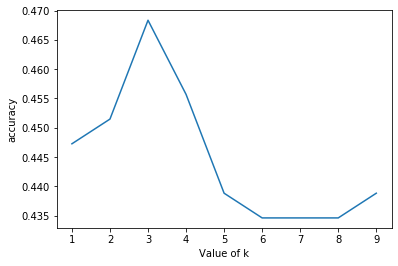

In [63]:
plt.figure()
plt.plot(np.arange(1,10),mean_acc)
plt.xlabel('Value of k')
plt.ylabel('accuracy')
plt.show()

### Using k=4 as per results from above graph

In [64]:
neighbors=4

In [65]:
knn_clf=KNeighborsClassifier(n_neighbors=neighbors).fit(X_train_tfidf,Y_train)

In [66]:
knn_predicted=knn_clf.predict(X_test_tfidf)

In [67]:
knn_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 3, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [68]:
jaccard_score(Y_test,knn_predicted,average='weighted')

0.23490737156613883

In [69]:
print(classification_report(Y_test, knn_predicted,labels=np.unique(knn_predicted)))

              precision    recall  f1-score   support

           1       0.45      0.94      0.61       102
           2       0.00      0.00      0.00        21
           3       0.40      0.11      0.17        38
           4       0.62      0.11      0.18        76

    accuracy                           0.46       237
   macro avg       0.37      0.29      0.24       237
weighted avg       0.46      0.46      0.35       237



In [70]:
knn_cm=confusion_matrix(Y_test,knn_predicted)
knn_cm

array([[96,  0,  3,  3],
       [20,  0,  1,  0],
       [31,  1,  4,  2],
       [66,  0,  2,  8]], dtype=int64)

In [71]:
knn_accuracy=metrics.accuracy_score(Y_test,knn_predicted)
knn_accuracy

0.45569620253164556

In [72]:
metrics.f1_score(Y_test,knn_predicted,average='weighted',labels=np.unique(knn_predicted))

0.346699085456019

## Using Support Vector Machines

In [73]:
from sklearn import svm

In [74]:
svm_clf= svm.SVC(kernel='rbf',gamma='auto').fit(X_train_tfidf,Y_train)

In [75]:
svm_predicted=svm_clf.predict(X_test_tfidf)

In [76]:
svm_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [77]:
jaccard_score(Y_test,svm_predicted,average='weighted')

0.18522672648614005

In [78]:
print(classification_report(Y_test, svm_predicted,labels=np.unique(svm_predicted)))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60       102

   micro avg       0.43      1.00      0.60       102
   macro avg       0.43      1.00      0.60       102
weighted avg       0.43      1.00      0.60       102



In [79]:
svm_cm=confusion_matrix(Y_test,svm_predicted)
svm_cm

array([[102,   0,   0,   0],
       [ 21,   0,   0,   0],
       [ 38,   0,   0,   0],
       [ 76,   0,   0,   0]], dtype=int64)

In [80]:
svm_accuracy=metrics.accuracy_score(Y_test,svm_predicted)
svm_accuracy

0.43037974683544306

In [81]:
metrics.f1_score(Y_test,svm_predicted,average='weighted',labels=np.unique(svm_predicted))

0.6017699115044248

## Decision Trees

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
decision_tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train_tfidf,Y_train)

In [84]:
decision_tree_predicted=decision_tree_clf.predict(X_test_tfidf)

In [85]:
decision_tree_predicted

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       3, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1,
       1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1], dtype=int64)

In [86]:
jaccard_score(Y_test,decision_tree_predicted,average='weighted')

0.25745867353462293

In [87]:
print(classification_report(Y_test, decision_tree_predicted,labels=np.unique(decision_tree_predicted)))

              precision    recall  f1-score   support

           1       0.48      0.87      0.62       102
           2       0.00      0.00      0.00        21
           3       0.33      0.05      0.09        38
           4       0.44      0.24      0.31        76

    accuracy                           0.46       237
   macro avg       0.31      0.29      0.25       237
weighted avg       0.40      0.46      0.38       237



In [88]:
decision_tree_cm=confusion_matrix(Y_test,decision_tree_predicted)
decision_tree_cm

array([[89,  2,  1, 10],
       [18,  0,  0,  3],
       [26,  0,  2, 10],
       [54,  1,  3, 18]], dtype=int64)

In [89]:
decision_tree_accuracy=metrics.accuracy_score(Y_test,decision_tree_predicted)
decision_tree_accuracy

0.459915611814346

In [90]:
metrics.f1_score(Y_test,decision_tree_predicted,average='weighted',labels=np.unique(decision_tree_predicted))

0.37832358755664786

## Random Forest Classification

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
random_forest_clf = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt').fit(X_train_tfidf,Y_train)

In [93]:
random_forest_predicted=random_forest_clf.predict(X_test_tfidf)

In [94]:
random_forest_predicted

array([4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1,
       3, 4, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4,
       1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4, 4,
       1, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1,
       1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 1, 1,
       3, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 3, 1, 3, 4, 4, 4, 1, 1, 3,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1], dtype=int64)

In [95]:
jaccard_score(Y_test,random_forest_predicted,average='weighted')

0.35130909823484835

In [96]:
print(classification_report(Y_test,random_forest_predicted,labels=np.unique(random_forest_predicted) ))

              precision    recall  f1-score   support

           1       0.60      0.82      0.70       102
           3       0.71      0.13      0.22        38
           4       0.44      0.53      0.48        76

   micro avg       0.54      0.60      0.57       216
   macro avg       0.59      0.49      0.47       216
weighted avg       0.57      0.60      0.54       216



In [97]:
random_forest_cm=confusion_matrix(Y_test,random_forest_predicted)
random_forest_cm

array([[84,  0,  1, 17],
       [ 9,  0,  1, 11],
       [10,  0,  5, 23],
       [36,  0,  0, 40]], dtype=int64)

In [98]:
random_forest_accuracy=metrics.accuracy_score(Y_test,random_forest_predicted)
random_forest_accuracy

0.5443037974683544

In [99]:
metrics.f1_score(Y_test,random_forest_predicted,average='weighted',labels=np.unique(random_forest_predicted))

0.536830391263986

## Notes

-  The performance metrics for the algorithms are OK with Random Forest outperforming the other algorithms.
    - The **reason for this subpar performance** is **class imbalance**. The distribution of data points in each of the four classes (1 - 4) is not balanced, which creates a biased scenario to the classes which have a higher number of samples.
    - Possible solution to mititgate this is to get more training data.

<hr>

-  There are some algorithms that might perform slightly better on this kind of dataset. Take a look at [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) and see how it performs. I am not sure if it's applicable to multiclass scenario but you can try it out.

### Isolation Forest

In [100]:
from sklearn.ensemble import IsolationForest

In [101]:
isolation_clf=IsolationForest(random_state=1,behaviour="new",contamination='auto').fit(X_train_tfidf)

In [102]:
isolation_predicted=isolation_clf.predict(X_test_tfidf)
isolation_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [103]:
jaccard_score(Y_test,isolation_predicted,average='weighted')

0.18522672648614005

In [104]:
print(classification_report(Y_test,isolation_predicted,labels=np.unique(isolation_predicted)))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60       102

   micro avg       0.43      1.00      0.60       102
   macro avg       0.43      1.00      0.60       102
weighted avg       0.43      1.00      0.60       102



In [105]:
isolation_accuracy=metrics.accuracy_score(Y_test,isolation_predicted)
isolation_accuracy

0.43037974683544306

In [106]:
isolation_cm=confusion_matrix(Y_test,isolation_predicted)
isolation_cm

array([[102,   0,   0,   0],
       [ 21,   0,   0,   0],
       [ 38,   0,   0,   0],
       [ 76,   0,   0,   0]], dtype=int64)

In [107]:
metrics.f1_score(Y_test,isolation_predicted,average='weighted',labels=np.unique(isolation_predicted))

0.6017699115044248

### Some data visualization

## Accuracy Graph

In [108]:
accuracy_list=[logistic_accuracy,isolation_accuracy,naive_bayes_accuracy,knn_accuracy,svm_accuracy,decision_tree_accuracy,random_forest_accuracy]

In [109]:
%matplotlib notebook

In [110]:
accuracy_x_labels=['logistic','isolation','naive_bayes','knn','svm','decision_tree','random_forest']

<IPython.core.display.Javascript object>


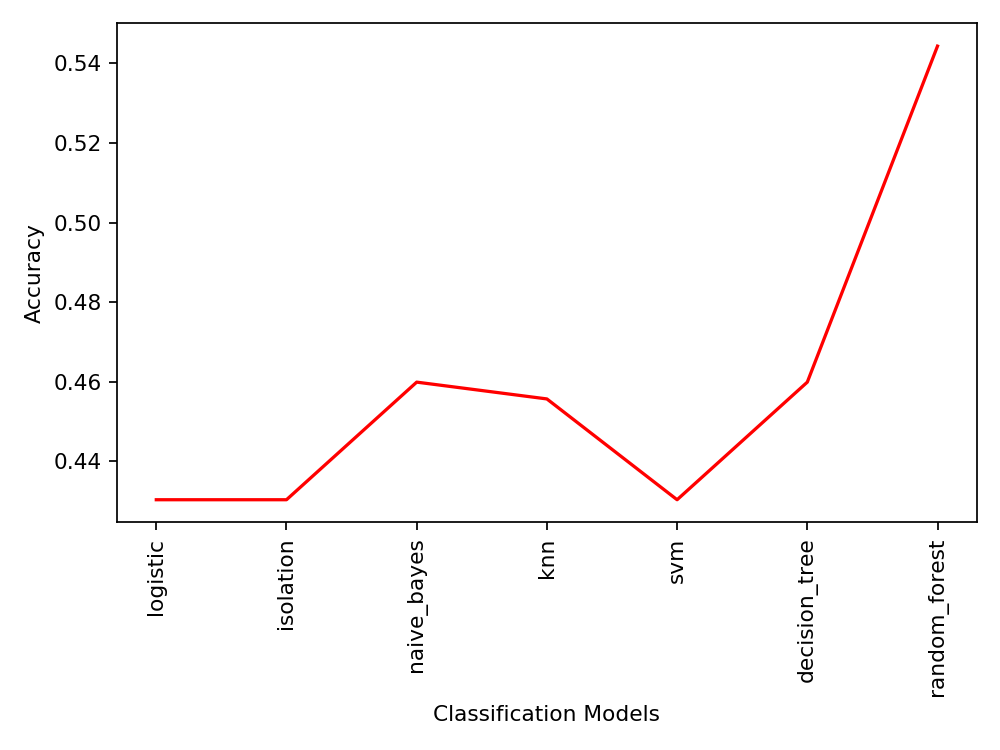

In [111]:
plt.figure()
plt.plot(accuracy_x_labels,accuracy_list,'-r')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

## F1 Score Graph

In [112]:
f1_random_forest=metrics.f1_score(Y_test,random_forest_predicted,average='weighted',labels=np.unique(random_forest_predicted))
f1_decision_tree=metrics.f1_score(Y_test,decision_tree_predicted,average='weighted',labels=np.unique(decision_tree_predicted))
f1_svm=metrics.f1_score(Y_test,svm_predicted,average='weighted',labels=np.unique(svm_predicted))
f1_knn=metrics.f1_score(Y_test,knn_predicted,average='weighted',labels=np.unique(knn_predicted))
f1_naive_bayes=metrics.f1_score(Y_test,naive_bayes_predicted,average='weighted',labels=np.unique(naive_bayes_predicted))
f1_logistic=metrics.f1_score(Y_test,logistic_predicted,average='weighted',labels=np.unique(logistic_predicted))
f1_isolation=metrics.f1_score(Y_test,isolation_predicted,average='weighted',labels=np.unique(isolation_predicted))

In [113]:
f1_score_list=[f1_logistic,f1_isolation,f1_naive_bayes,f1_knn,f1_svm,f1_decision_tree,f1_random_forest]

In [114]:
f1_score_x_labels=['logistic','isolation','naive_bayes','knn','svm','decision_tree','random_forest']

<IPython.core.display.Javascript object>


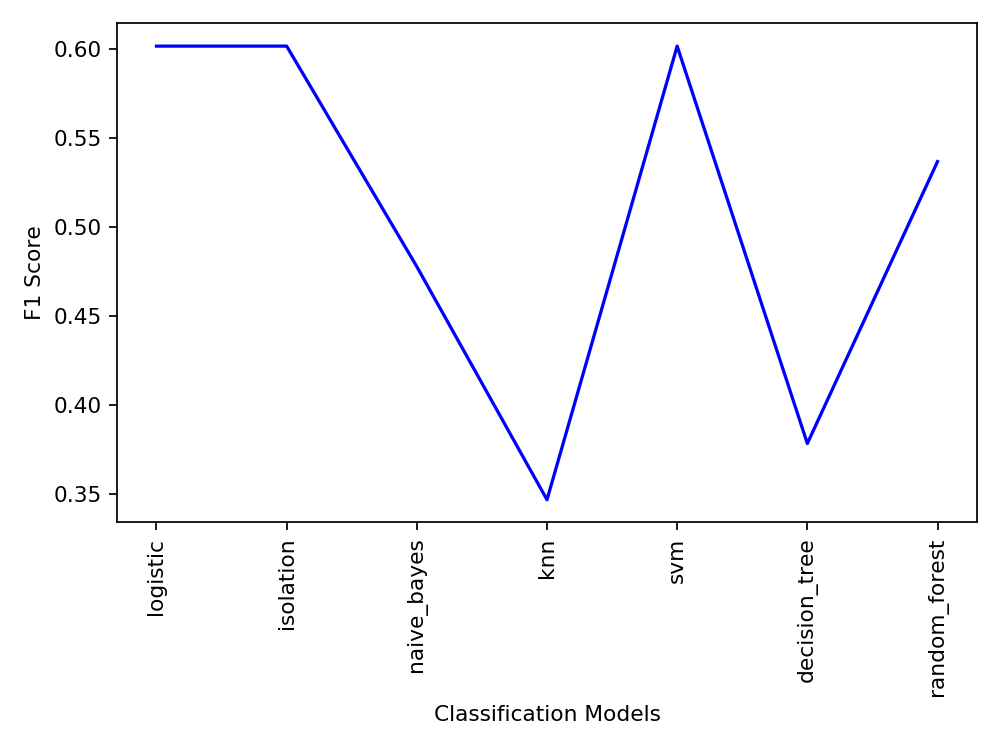

In [115]:
plt.figure()
plt.plot(f1_score_x_labels,f1_score_list,'-b')
plt.xlabel('Classification Models')
plt.ylabel('F1 Score')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Creating a report

In [116]:
data={'model':['Logistic','Isolation','Naive Bayes','KNN','SVM','Decision Tree','Random Forest'],
     'Accuracy':accuracy_list,'F1 Score':f1_score_list}

In [117]:
report_df=pd.DataFrame(data)

In [118]:
report_df.set_index('model',inplace=True)

In [119]:
report_df.sort_values(by='Accuracy',axis=0,ascending=False,inplace=True)

In [120]:
report_df

,Accuracy,F1 Score
model,,
Random Forest,0.544304,0.536830
Naive Bayes,0.459916,0.477781
Decision Tree,0.459916,0.378324
KNN,0.455696,0.346699
Logistic,0.430380,0.601770
Isolation,0.430380,0.601770
SVM,0.430380,0.601770
